**Regressão Linear**

**Parte 1: Leitura e parsing da base de dados**

**(1a) Verificando os dados disponíveis **

In [2]:
sc = SparkContext.getOrCreate()

In [3]:
# carregar base de dados
from test_helper import Test
import os.path
baseDir = os.path.join('Data')
inputPath = os.path.join('Aula04', 'millionsong.txt')
fileName = os.path.join(baseDir, inputPath)

numPartitions = 2
rawData = sc.textFile(fileName, numPartitions)

In [4]:

# EXERCICIO
numPoints = rawData.count()
print numPoints
samplePoints = rawData.take(5)
print samplePoints

6724
[u'2001.0,0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817', u'2001.0,0.854411946129,0.604124786151,0.593634078776,0.495885413963,0.266307830936,0.261472105188,0.506387076327,0.464453565511,0.665798573683,0.542968988766,0.58044428577,0.445219373624', u'2001.0,0.908982970575,0.632063159227,0.557428975183,0.498263761394,0.276396052336,0.312809861625,0.448530069406,0.448674249968,0.649791323916,0.489868662682,0.591908113534,0.4500023818', u'2001.0,0.842525219898,0.561826888508,0.508715259692,0.443531142139,0.296733836002,0.250213568176,0.488540873206,0.360508747659,0.575435243185,0.361005878554,0.678378718617,0.409036786173', u'2001.0,0.909303285534,0.653607720915,0.585580794716,0.473250503005,0.251417011835,0.326976795524,0.40432273022,0.371154511756,0.629401917965,0.482243251755,0.566901413923,0.463373691946']


In [5]:
# TEST Load and check the data (1a)
Test.assertEquals(numPoints, 6724, 'incorrect value for numPoints')
Test.assertEquals(len(samplePoints), 5, 'incorrect length for samplePoints')

1 test passed.
1 test passed.


**(1b) Usando LabeledPoint **

In [7]:
from pyspark.mllib.regression import LabeledPoint
import numpy as np

# Here is a sample raw data point:
# '2001.0,0.884,0.610,0.600,0.474,0.247,0.357,0.344,0.33,0.600,0.425,0.60,0.419'
# In this raw data point, 2001.0 is the label, and the remaining values are features

In [11]:
# EXERCICIO
def parsePoint(line):
    """Converts a comma separated unicode string into a `LabeledPoint`.

    Args:
        line (unicode): Comma separated unicode string where the first element is the label and the
            remaining elements are features.

    Returns:
        LabeledPoint: The line is converted into a `LabeledPoint`, which consists of a label and
            features.
    """
    Point = map(float,line.split(','))
    return LabeledPoint(Point[0],Point[1:])

parsedSamplePoints = map(parsePoint,samplePoints)
firstPointFeatures = parsedSamplePoints[0].features
firstPointLabel = parsedSamplePoints[0].label
print firstPointFeatures, firstPointLabel

d = len(firstPointFeatures)
print d

[0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817] 2001.0
12


In [12]:
# TEST Using LabeledPoint (1b)
Test.assertTrue(isinstance(firstPointLabel, float), 'label must be a float')
expectedX0 = [0.8841,0.6105,0.6005,0.4747,0.2472,0.3573,0.3441,0.3396,0.6009,0.4257,0.6049,0.4192]
Test.assertTrue(np.allclose(expectedX0, firstPointFeatures, 1e-4, 1e-4),
                'incorrect features for firstPointFeatures')
Test.assertTrue(np.allclose(2001.0, firstPointLabel), 'incorrect label for firstPointLabel')
Test.assertTrue(d == 12, 'incorrect number of features')

1 test passed.
1 test passed.
1 test passed.
1 test passed.


**Visualização 1: Atributos**

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sampleMorePoints = rawData.take(50)

parsedSampleMorePoints = map(parsePoint, sampleMorePoints)
dataValues = map(lambda lp: lp.features.toArray(), parsedSampleMorePoints)

def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot
fig, ax = preparePlot(np.arange(.5, 11, 1), np.arange(.5, 49, 1), figsize=(8,7), hideLabels=True,
                      gridColor='#eeeeee', gridWidth=1.1)
image = plt.imshow(dataValues,interpolation='nearest', aspect='auto', cmap=cm.Greys)
for x, y, s in zip(np.arange(-.125, 12, 1), np.repeat(-.75, 12), [str(x) for x in range(12)]):
    plt.text(x, y, s, color='#999999', size='10')
plt.text(4.7, -3, 'Feature', color='#999999', size='11'), ax.set_ylabel('Observation')
pass

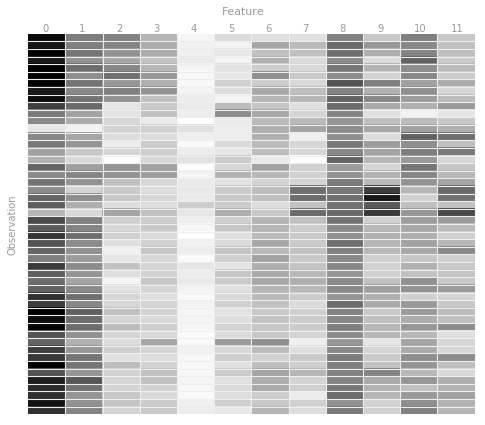

In [14]:
plt.show()

**(1c) Deslocando os rótulos **

In [23]:

# EXERCICIO
parsedDataInit = rawData.map(parsePoint)
onlyLabels = parsedDataInit.map(lambda x: x.label)
#verificar qual é a faixa de valores dos rótulos
minYear = onlyLabels.min()
maxYear = onlyLabels.max()
print maxYear, minYear# TEST Find the range (1c)


2011.0 1922.0


In [24]:
Test.assertEquals(len(parsedDataInit.take(1)[0].features), 12,
                  'unexpected number of features in sample point')
sumFeatTwo = parsedDataInit.map(lambda lp: lp.features[2]).sum()
Test.assertTrue(np.allclose(sumFeatTwo, 3158.96224351), 'parsedDataInit has unexpected values')
yearRange = maxYear - minYear
Test.assertTrue(yearRange == 89, 'incorrect range for minYear to maxYear')

1 test passed.
1 test passed.
1 test passed.


In [42]:
# EXERCICIO
#subtrair os rótulos pelo menor valor encontrado
parsedData = parsedDataInit.map(lambda x: LabeledPoint(x.label - minYear, x.features))

# Should be a LabeledPoint
print type(parsedData.take(1)[0])
# View the first point
print '\n{0}'.format(parsedData.take(1))

<class 'pyspark.mllib.regression.LabeledPoint'>

[LabeledPoint(79.0, [0.884123733793,0.610454259079,0.600498416968,0.474669212493,0.247232680947,0.357306088914,0.344136412234,0.339641227335,0.600858840135,0.425704689024,0.60491501652,0.419193351817])]


In [43]:
# TEST Shift labels (1d)
oldSampleFeatures = parsedDataInit.take(1)[0].features
newSampleFeatures = parsedData.take(1)[0].features
Test.assertTrue(np.allclose(oldSampleFeatures, newSampleFeatures),
                'new features do not match old features')
sumFeatTwo = parsedData.map(lambda lp: lp.features[2]).sum()
Test.assertTrue(np.allclose(sumFeatTwo, 3158.96224351), 'parsedData has unexpected values')
minYearNew = parsedData.map(lambda lp: lp.label).min()
maxYearNew = parsedData.map(lambda lp: lp.label).max()
Test.assertTrue(minYearNew == 0, 'incorrect min year in shifted data')
Test.assertTrue(maxYearNew == 89, 'incorrect max year in shifted data')

1 test passed.
1 test passed.
1 test passed.
1 test passed.


**(1d) Conjuntos de treino, validação e teste**

In [50]:
# EXERCICIO
weights = [.8, .1, .1]
seed = 42

#Use o método randomSplit method com os pesos (weights) e a semente aleatória (seed) especificados na célula abaixo 
#parar criar a divisão das bases. 
parsedTrainData, parsedValData, parsedTestData = parsedData.randomSplit(weights, seed)

#Em seguida, utilizando o método cache() faça o pré-armazenamento da base processada
parsedTrainData.cache()
parsedValData.cache()
parsedTestData.cache()

nTrain = parsedTrainData.count()
nVal = parsedValData.count()
nTest = parsedTestData.count()

print nTrain, nVal, nTest, nTrain + nVal + nTest
print parsedData.count()


5371 682 671 6724
6724


In [51]:
# TEST Training, validation, and test sets (1e)
Test.assertEquals(parsedTrainData.getNumPartitions(), numPartitions,
                  'parsedTrainData has wrong number of partitions')
Test.assertEquals(parsedValData.getNumPartitions(), numPartitions,
                  'parsedValData has wrong number of partitions')
Test.assertEquals(parsedTestData.getNumPartitions(), numPartitions,
                  'parsedTestData has wrong number of partitions')
Test.assertEquals(len(parsedTrainData.take(1)[0].features), 12,
                  'parsedTrainData has wrong number of features')
sumFeatTwo = (parsedTrainData
              .map(lambda lp: lp.features[2])
              .sum())
sumFeatThree = (parsedValData
                .map(lambda lp: lp.features[3])
                .reduce(lambda x, y: x + y))
sumFeatFour = (parsedTestData
               .map(lambda lp: lp.features[4])
               .reduce(lambda x, y: x + y))
Test.assertTrue(np.allclose([sumFeatTwo, sumFeatThree, sumFeatFour],
                            2526.87757656, 297.340394298, 184.235876654),
                'parsed Train, Val, Test data has unexpected values')
Test.assertTrue(nTrain + nVal + nTest == 6724, 'unexpected Train, Val, Test data set size')
Test.assertEquals(nTrain, 5371, 'unexpected value for nTrain')
Test.assertEquals(nVal, 682, 'unexpected value for nVal')
Test.assertEquals(nTest, 671, 'unexpected value for nTest')

1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.


**Part 2: Criando o modelo de baseline **
    
**(2a) Rótulo médio**

In [54]:
# EXERCICIO
averageTrainYear = (parsedTrainData
#Um baseline muito utilizado é fazer a mesma predição independente dos dados analisados utilizando o rótulo médio 
#do conjunto de treino.
                    .map(lambda x: x.label)
#Calcule a média dos rótulos deslocados para a base de treino
                    .mean()
                   )
print averageTrainYear

53.9316700801


In [55]:

# TEST Average label (2a)
Test.assertTrue(np.allclose(averageTrainYear, 53.9316700801),
                'incorrect value for averageTrainYear')

1 test passed.


**(2b) Erro quadrático médio **

In [74]:
# EXERCICIO
def squaredError(label, prediction):
    """Calculates the the squared error for a single prediction.

    Args:
        label (float): The correct value for this observation.
        prediction (float): The predicted value for this observation.

    Returns:
        float: The difference between the `label` and `prediction` squared.
    """
    # retorna a diferença entre a label e a predição ao quadrado
    return np.square(label-prediction)

def calcRMSE(labelsAndPreds):
    """Calculates the root mean squared error for an `RDD` of (label, prediction) tuples.

    Args:
        labelsAndPred (RDD of (float, float)): An `RDD` consisting of (label, prediction) tuples.

    Returns:
        float: The square root of the mean of the squared errors.
    """
    #retorna a raiz quadrada da média dos quadrados dos erros
    return np.sqrt(labelsAndPreds.map(lambda x: squaredError(x[0],x[1])).mean())

labelsAndPreds = sc.parallelize([(3., 1.), (1., 2.), (2., 2.)])
# RMSE = sqrt[((3-1)^2 + (1-2)^2 + (2-2)^2) / 3] = 1.291
exampleRMSE = calcRMSE(labelsAndPreds)
print exampleRMSE

1.29099444874


In [65]:
# TEST Root mean squared error (2b)
Test.assertTrue(np.allclose(squaredError(3, 1), 4.), 'incorrect definition of squaredError')
Test.assertTrue(np.allclose(exampleRMSE, 1.29099444874), 'incorrect value for exampleRMSE')

1 test passed.
1 test passed.


**(2c) RMSE do baseline para os conjuntos de treino, validação e teste**

In [80]:
# EXERCICIO
# crie uma RDD de (rótulo, predição) para cada conjunto
labelsAndPredsTrain = parsedTrainData.map(lambda x: (x.label, averageTrainYear))
rmseTrainBase = calcRMSE(labelsAndPredsTrain)

#crie uma RDD de (rótulo, predição) para cada conjunto
labelsAndPredsVal = parsedValData.map(lambda x: (x.label, averageTrainYear))
rmseValBase = calcRMSE(labelsAndPredsVal)

#crie uma RDD de (rótulo, predição) para cada conjunto
labelsAndPredsTest = parsedTestData.map(lambda x: (x.label, averageTrainYear))
rmseTestBase = calcRMSE(labelsAndPredsTest)

print 'Baseline Train RMSE = {0:.3f}'.format(rmseTrainBase)
print 'Baseline Validation RMSE = {0:.3f}'.format(rmseValBase)
print 'Baseline Test RMSE = {0:.3f}'.format(rmseTestBase)

Baseline Train RMSE = 21.306
Baseline Validation RMSE = 21.586
Baseline Test RMSE = 22.137


In [81]:
# TEST Training, validation and test RMSE (2c)
Test.assertTrue(np.allclose([rmseTrainBase, rmseValBase, rmseTestBase],
                            [21.305869, 21.586452, 22.136957]), 'incorrect RMSE value')

1 test passed.


**Visualização 2: Predição vs. real **

In [83]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
cmap = get_cmap('YlOrRd')
norm = Normalize()

actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label)
                    .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, lp.label))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 100, 20), np.arange(0, 100, 20))
plt.scatter(actual, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.5)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')
pass

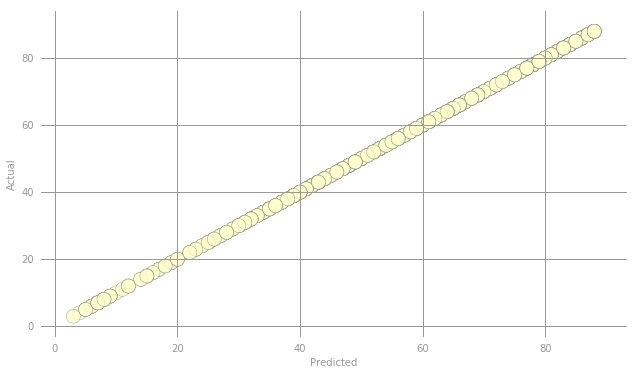

In [84]:
plt.show()

In [85]:
predictions = np.asarray(parsedValData
                         .map(lambda lp: averageTrainYear)
                         .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, averageTrainYear))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())
norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(53.0, 55.0, 0.5), np.arange(0, 100, 20))
ax.set_xlim(53, 55)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.3)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')

(<matplotlib.text.Text at 0x9bc1828>, <matplotlib.text.Text at 0x9ed52b0>)

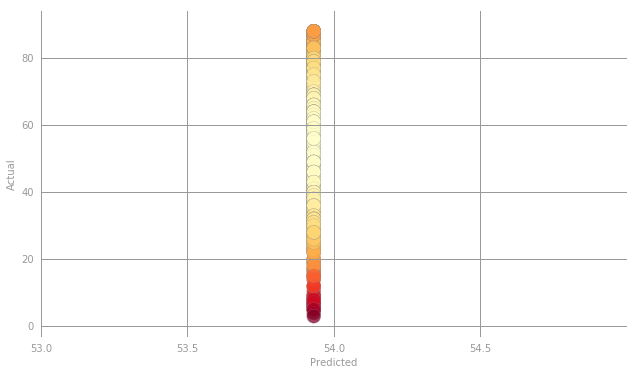

In [86]:
plt.show()

**Parte 3: Treinando e avaliando o modelo de regressão linear **

**(3a) Gradiente do erro**

In [88]:
from pyspark.mllib.linalg import DenseVector

In [112]:
# EXERCICIO
def gradientSummand(weights, lp):
    """Calculates the gradient summand for a given weight and `LabeledPoint`.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        weights (DenseVector): An array of model weights (betas).
        lp (LabeledPoint): The `LabeledPoint` for a single observation.

    Returns:
        DenseVector: An array of values the same length as `weights`.  The gradient summand.
    """
    # retorna um vetor de valores com o mesmo comprimento que os `pesos'
    return (np.dot(weights,lp.features)-lp.label)

exampleW = DenseVector([1, 1, 1])
exampleLP = LabeledPoint(2.0, [3, 1, 4])

summandOne = gradientSummand(exampleW, exampleLP)
print summandOne

exampleW = DenseVector([.24, 1.2, -1.4])
exampleLP = LabeledPoint(3.0, [-1.4, 4.2, 2.1])
summandTwo = gradientSummand(exampleW, exampleLP)
print summandTwo

6.0
-1.236


In [113]:
# TEST Gradient summand (3a)
Test.assertTrue(np.allclose(summandOne, [18., 6., 24.]), 'incorrect value for summandOne')
Test.assertTrue(np.allclose(summandTwo, [1.7304,-5.1912,-2.5956]), 'incorrect value for summandTwo')

1 test failed. incorrect value for summandOne
1 test failed. incorrect value for summandTwo


**(3b) Use os pesos para fazer a predição **

In [124]:
# EXERCICIO
def getLabeledPrediction(weights, observation):
    """Calculates predictions and returns a (label, prediction) tuple.

    Note:
        The labels should remain unchanged as we'll use this information to calculate prediction
        error later.

    Args:
        weights (np.ndarray): An array with one weight for each features in `trainData`.
        observation (LabeledPoint): A `LabeledPoint` that contain the correct label and the
            features for the data point.

    Returns:
        tuple: A (label, prediction) tuple.
    """
    return (observation.label, np.dot(weights,observation.features))

weights = np.array([1.0, 1.5])
predictionExample = sc.parallelize([LabeledPoint(2, np.array([1.0, .5])),
                                    LabeledPoint(1.5, np.array([.5, .5]))])
labelsAndPredsExample = predictionExample.map(lambda lp: getLabeledPrediction(weights, lp))
print labelsAndPredsExample.collect()

[(2.0, 1.75), (1.5, 1.25)]


In [125]:
# TEST Use weights to make predictions (3b)
Test.assertEquals(labelsAndPredsExample.collect(), [(2.0, 1.75), (1.5, 1.25)],
                  'incorrect definition for getLabeledPredictions')

1 test passed.


** (3c) Gradiente descendente **

In [167]:
# EXERCICIO
def linregGradientDescent(trainData, numIters):
    """Calculates the weights and error for a linear regression model trained with gradient descent.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        trainData (RDD of LabeledPoint): The labeled data for use in training the model.
        numIters (int): The number of iterations of gradient descent to perform.

    Returns:
        (np.ndarray, np.ndarray): A tuple of (weights, training errors).  Weights will be the
            final weights (one weight per feature) for the model, and training errors will contain
            an error (RMSE) for each iteration of the algorithm.
    """
    # The length of the training data
    n = len (trainData)
    # The number of features in the training data
    d = (trainData.take(1)[0].features),count()
    w = np.zeros(d)
    alpha = 1.0
    # We will compute and store the training error after each iteration
    errorTrain = np.zeros(numIters)
    for i in range(numIters):
        # Use getLabeledPrediction from (3b) with trainData to obtain an RDD of (label, prediction)
        # tuples.  Note that the weights all equal 0 for the first iteration, so the predictions will
        # have large errors to start.
        labelsAndPredsTrain = trainData.map(lambda x: getLabeledPrediction(w,x))
        errorTrain[i] = <COMPLETAR>

        # Calculate the `gradient`.  Make use of the `gradientSummand` function you wrote in (3a).
        # Note that `gradient` sould be a `DenseVector` of length `d`.
        gradient = trainData.map(lambda x: gradientSummand(w,x)).sum()

        # Update the weights
        alpha_i = alpha / (n * np.sqrt(i+1))
        w -= alpha_i*gradient
    return w, errorTrain

# create a toy dataset with n = 10, d = 3, and then run 5 iterations of gradient descent
# note: the resulting model will not be useful; the goal here is to verify that
# linregGradientDescent is working properly
exampleN = 10
exampleD = 3
exampleData = (sc
               .parallelize(parsedTrainData.take(exampleN))
               .map(lambda lp: LabeledPoint(lp.label, lp.features[0:exampleD])))
print exampleData.take(2)
exampleNumIters = 5
exampleWeights, exampleErrorTrain = linregGradientDescent(exampleData, exampleNumIters)
print exampleWeights

SyntaxError: invalid syntax (<ipython-input-167-e689a11ac233>, line 31)

In [168]:
# TEST Gradient descent (3c)
expectedOutput = [48.88110449,  36.01144093, 30.25350092]
Test.assertTrue(np.allclose(exampleWeights, expectedOutput), 'value of exampleWeights is incorrect')
expectedError = [79.72013547, 30.27835699,  9.27842641,  9.20967856,  9.19446483]
Test.assertTrue(np.allclose(exampleErrorTrain, expectedError),
                'value of exampleErrorTrain is incorrect')

NameError: name 'exampleWeights' is not defined

**(3d) Treinando o modelo na base de dados**

In [170]:
# EXERCICIO
numIters = 50
weightsLR0, errorTrainLR0 =linregGradientDescent()

labelsAndPreds = parsedValData.getLabeledPrediction() 
rmseValLR0 = calcRMSE(labelsAndPreds)

print 'Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}'.format(rmseValBase,
                                                                       rmseValLR0)


NameError: name 'linregGradientDescent' is not defined

In [171]:

# TEST Train the model (3d)
expectedOutput = [22.64535883, 20.064699, -0.05341901, 8.2931319, 5.79155768, -4.51008084,
                  15.23075467, 3.8465554, 9.91992022, 5.97465933, 11.36849033, 3.86452361]
Test.assertTrue(np.allclose(weightsLR0, expectedOutput), 'incorrect value for weightsLR0')

NameError: name 'weightsLR0' is not defined

In [ ]:
norm = Normalize()
clrs = cmap(np.asarray(norm(np.log(errorTrainLR0))))[:,0:3]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(2, 6, 1))
ax.set_ylim(2, 6)
plt.scatter(range(0, numIters), np.log(errorTrainLR0), s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xlabel('Iteration'), ax.set_ylabel(r'$\log_e(errorTrainLR0)$')
pass

In [ ]:
norm = Normalize()
clrs = cmap(np.asarray(norm(errorTrainLR0[6:])))[:,0:3]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(17, 22, 1))
ax.set_ylim(17.8, 21.2)
plt.scatter(range(0, numIters-6), errorTrainLR0[6:], s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xticklabels(map(str, range(6, 66, 10)))
ax.set_xlabel('Iteration'), ax.set_ylabel(r'Training Error')
pass

**Part 4: Treino utilizando MLlib e Busca em Grade (Grid Search) **

**(4a) LinearRegressionWithSGD **

In [176]:
from pyspark.mllib.regression import LinearRegressionWithSGD
# Values to use when training the linear regression model
numIters = 500  # iterations
alpha = 1.0  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

In [179]:
# EXERCICIO
firstModel = LinearRegressionWithSGD.train(parsedTrainData, iterations = numIters, step = alpha, miniBatchFraction = 1.0,
                                          regParam=reg,regType=regType, intercept=useIntercept)

# weightsLR1 stores the model weights; interceptLR1 stores the model intercept
weightsLR1 = firstModel.weights
interceptLR1 = firstModel.intercept
print weightsLR1, interceptLR1

[15.9789216525,13.923582484,0.781551054803,6.09257051566,3.91814791179,-2.30347707767,10.3002026917,3.04565129011,7.23175674717,4.65796458476,7.98875075855,3.1782463856] 13.3763009811


In [180]:
# TEST LinearRegressionWithSGD (4a)
expectedIntercept = 13.3335907631
expectedWeights = [16.682292427, 14.7439059559, -0.0935105608897, 6.22080088829, 4.01454261926, -3.30214858535,
                   11.0403027232, 2.67190962854, 7.18925791279, 4.46093254586, 8.14950409475, 2.75135810882]
Test.assertTrue(np.allclose(interceptLR1, expectedIntercept), 'incorrect value for interceptLR1')
Test.assertTrue(np.allclose(weightsLR1, expectedWeights), 'incorrect value for weightsLR1')

1 test failed. incorrect value for interceptLR1
1 test failed. incorrect value for weightsLR1


**(4b) Predição**

In [184]:
# EXERCICIO
samplePoint = parsedTrainData.take(1)[0]
#Passe o atributo features de um LabeledPoint comp parâmetro.
samplePrediction = firstModel.predict(samplePoint.features)
print samplePrediction

56.5823796609


In [185]:
# TEST Predict (4b)
Test.assertTrue(np.allclose(samplePrediction, 56.8013380112),
                'incorrect value for samplePrediction')

1 test failed. incorrect value for samplePrediction


**(4c) Avaliar RMSE **

In [202]:
# EXERCICIO

#Use o método predict() para criar o RDD labelsAndPreds RDD, e então use a função calcRMSE() da Parte (2b) para calcular o RMSE.
labelsAndPreds = parsedValData.map(lambda x: (firstModel.predict(x.features)))
rmseValLR1 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}' +
       '\n\tLR1 = {2:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 251.0 failed 1 times, most recent failure: Lost task 0.0 in stage 251.0 (TID 478, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 177, in main
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 172, in process
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 346, in func
    return f(iterator)
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 1051, in <lambda>
    return self.mapPartitions(lambda i: [StatCounter(i)]).reduce(redFunc)
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\statcounter.py", line 42, in __init__
    for v in values:
  File "<ipython-input-74-a37e6bbf4ab8>", line 25, in <lambda>
IndexError: invalid index to scalar variable.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1499)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1487)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1486)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1486)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1714)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1669)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1658)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2022)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2043)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2062)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2087)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:458)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 177, in main
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 172, in process
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 346, in func
    return f(iterator)
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\rdd.py", line 1051, in <lambda>
    return self.mapPartitions(lambda i: [StatCounter(i)]).reduce(redFunc)
  File "C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\statcounter.py", line 42, in __init__
    for v in values:
  File "<ipython-input-74-a37e6bbf4ab8>", line 25, in <lambda>
IndexError: invalid index to scalar variable.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more


In [203]:
# TEST Evaluate RMSE (4c)
Test.assertTrue(np.allclose(rmseValLR1, 19.691247), 'incorrect value for rmseValLR1')

1 test failed. incorrect value for rmseValLR1


**(4d) Grid search**

In [222]:
# EXERCICIO
bestRMSE = rmseValLR1
bestRegParam = reg
bestModel = firstModel

numIters = 500
alpha = 1.0
miniBatchFrac = 1.0
#Tente valores para regParam dentro do conjunto 1e-10, 1e-5, e 1
for reg in [1e-10, 1e-5, 1]:
    model = LinearRegressionWithSGD.train(parsedTrainData, numIters, alpha,
                                          miniBatchFrac, regParam=reg,
                                          regType='l2', intercept=True)
    labelsAndPreds = parsedValData.map(lambda x: (x.label, model.predict(x.features)))
    
    rmseValGrid = calcRMSE(labelsAndPreds)
    print rmseValGrid

    if rmseValGrid < bestRMSE:
        bestRMSE = rmseValGrid
        bestRegParam = reg
        bestModel = model
rmseValLRGrid = bestRMSE

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}\n\tLR1 = {2:.3f}\n' +
       '\tLRGrid = {3:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1, rmseValLRGrid)

17.4831362704
17.4834818658
23.8000672935


NameError: name 'rmseValLR0' is not defined

In [221]:

# TEST Grid search (4d)
Test.assertTrue(np.allclose(17.017170, rmseValLRGrid), 'incorrect value for rmseValLRGrid')

1 test failed. incorrect value for rmseValLRGrid


**Visualização 5: Predições do melhor modelo**

In [223]:
predictions = np.asarray(parsedValData
                         .map(lambda lp: bestModel.predict(lp.features))
                         .collect())
actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label)
                    .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, bestModel.predict(lp.features)))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())

norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 120, 20))
ax.set_xlim(15, 82), ax.set_ylim(-5, 105)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=.5)
ax.set_xlabel('Predicted'), ax.set_ylabel(r'Actual')
pass

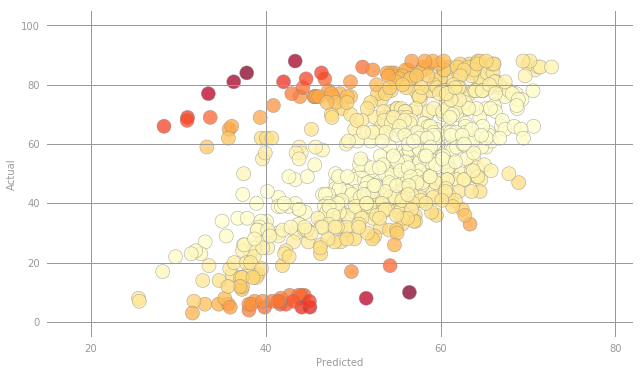

In [224]:
plt.show()

**(4e) Grid Search para o valor de alfa e número de iterações**

In [227]:
# EXERCICIO
reg = bestRegParam
modelRMSEs = []
#Especificamente tente os valores 1e-5 e 10 para alpha 
for alpha in [1e-5, 10]:
    #e os valores 5 e 500 para número de iterações
    for numIters in [5,500]:
        model = LinearRegressionWithSGD.train(parsedTrainData, numIters, alpha,
                                              miniBatchFrac, regParam=reg,
                                              regType='l2', intercept=True)
        labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
        rmseVal = calcRMSE(labelsAndPreds)
        print 'alpha = {0:.0e}, numIters = {1}, RMSE = {2:.3f}'.format(alpha, numIters, rmseVal)
        modelRMSEs.append(rmseVal)

alpha = 1e-05, numIters = 5, RMSE = 56.973
alpha = 1e-05, numIters = 500, RMSE = 56.973
alpha = 1e+01, numIters = 5, RMSE = 355124752.221
alpha = 1e+01, numIters = 500, RMSE = 33110728225679002898243535475370381153231748093308519592022542725707151441177139778832831219138213677907418329889500037120.000


C:\opt\spark\spark-2.2.0-bin-hadoop2.7\python\pyspark\statcounter.py:83: RuntimeWarning: overflow encountered in double_scalars
  self.m2 += other.m2 + (delta * delta * self.n * other.n) / (self.n + other.n)


In [228]:
# TEST Vary alpha and the number of iterations (4e)
expectedResults = sorted([56.969705, 56.892949, 355124752.221221])
Test.assertTrue(np.allclose(sorted(modelRMSEs)[:3], expectedResults), 'incorrect value for modelRMSEs')

1 test failed. incorrect value for modelRMSEs


**Parte 5: Adicionando atributos não-lineares**

**(5a) Interações par a par**

In [ ]:
# EXERCICIO
import itertools

def twoWayInteractions(lp):
    """Creates a new `LabeledPoint` that includes two-way interactions.

    Note:
        For features [x, y] the two-way interactions would be [x^2, x*y, y*x, y^2] and these
        would be appended to the original [x, y] feature list.

    Args:
        lp (LabeledPoint): The label and features for this observation.

    Returns:
        LabeledPoint: The new `LabeledPoint` should have the same label as `lp`.  Its features
            should include the features from `lp` followed by the two-way interaction features.
    """
    newfeats = <COMPLETAR>
    return LabeledPoint(lp.label, <COMPLETAR>)
    #return lp
    

print twoWayInteractions(LabeledPoint(0.0, [2, 3]))

# Transform the existing train, validation, and test sets to include two-way interactions.
trainDataInteract = parsedTrainData.map(twoWayInteractions)
valDataInteract = parsedValData.map(twoWayInteractions)
testDataInteract = parsedTestData.map(twoWayInteractions)

In [ ]:
# TEST Add two-way interactions (5a)
twoWayExample = twoWayInteractions(LabeledPoint(0.0, [2, 3]))
Test.assertTrue(np.allclose(sorted(twoWayExample.features),
                            sorted([2.0, 3.0, 4.0, 6.0, 6.0, 9.0])),
                'incorrect features generatedBy twoWayInteractions')
twoWayPoint = twoWayInteractions(LabeledPoint(1.0, [1, 2, 3]))
Test.assertTrue(np.allclose(sorted(twoWayPoint.features),
                            sorted([1.0,2.0,3.0,1.0,2.0,3.0,2.0,4.0,6.0,3.0,6.0,9.0])),
                'incorrect features generated by twoWayInteractions')
Test.assertEquals(twoWayPoint.label, 1.0, 'incorrect label generated by twoWayInteractions')
Test.assertTrue(np.allclose(sum(trainDataInteract.take(1)[0].features), 40.821870576035529),
                'incorrect features in trainDataInteract')
Test.assertTrue(np.allclose(sum(valDataInteract.take(1)[0].features), 45.457719932695696),
                'incorrect features in valDataInteract')
Test.assertTrue(np.allclose(sum(testDataInteract.take(1)[0].features), 35.109111632783168),
                'incorrect features in testDataInteract')

**(5b) Construindo um novo modelo **

In [234]:
# EXERCICIO
numIters = 500
alpha = 1.0
miniBatchFrac = 1.0
reg = 1e-10

modelInteract = LinearRegressionWithSGD.train(trainDataInteract, numIters, alpha,
                                              miniBatchFrac, regParam=reg,
                                              regType='l2', intercept=True)
labelsAndPredsInteract = valDataInteract.map(lambda x: (x.label, modelInteract.predict(x.features)))
rmseValInteract = calcRMSE(labelsAndPredsInteract)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}\n\tLR1 = {2:.3f}\n\tLRGrid = ' +
       '{3:.3f}\n\tLRInteract = {4:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1,
                                                 rmseValLRGrid, rmseValInteract)

NameError: name 'trainDataInteract' is not defined

In [ ]:
# TEST Build interaction model (5b)
Test.assertTrue(np.allclose(rmseValInteract, 15.6894664683), 'incorrect value for rmseValInteract')

**(5c) Avaliando o modelo de interação **

In [236]:
# EXERCICIO
labelsAndPredsTest = testDataInteract.map(lambda x: (x.label, modelInteract.predict(x.features)))
rmseTestInteract = calcRMSE(labelsAndPredsTest)

print ('Test RMSE:\n\tBaseline = {0:.3f}\n\tLRInteract = {1:.3f}'
       .format(rmseTestBase, rmseTestInteract))

NameError: name 'testDataInteract' is not defined

In [ ]:
# TEST Evaluate interaction model on test data (5c)
Test.assertTrue(np.allclose(rmseTestInteract, 16.3272040537),
                'incorrect value for rmseTestInteract')